In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def exibirImagem(imagem):
    img = plt.figure(figsize = (30, 28))
    ax = img.add_subplot(111)
    ax.imshow(imagem, cmap = "gray")
    plt.show()

item = cv2.imread("piracanjuba.png")
item = cv2.cvtColor(item, cv2.COLOR_BGR2GRAY)

prateleira = cv2.imread("prateleira.png")
prateleira = cv2.cvtColor(prateleira, cv2.COLOR_BGR2GRAY)

sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(item, None)
kp2, des2 = sift.detectAndCompute(prateleira, None)

In [25]:
FLANN_INDEX_KDTREE = 0

index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

In [26]:
flann = cv2.FlannBasedMatcher(index_params, search_params)

In [27]:
matches = flann.knnMatch(des1, des2, k = 2)

In [28]:
good = []

for match1, match2 in matches:
    if(match1.distance < 0.75 * match2.distance):
        good.append([match1])

In [31]:
flann_matches = cv2.drawMatchesKnn(item, kp1, prateleira, kp2, good, None, flags = 2)

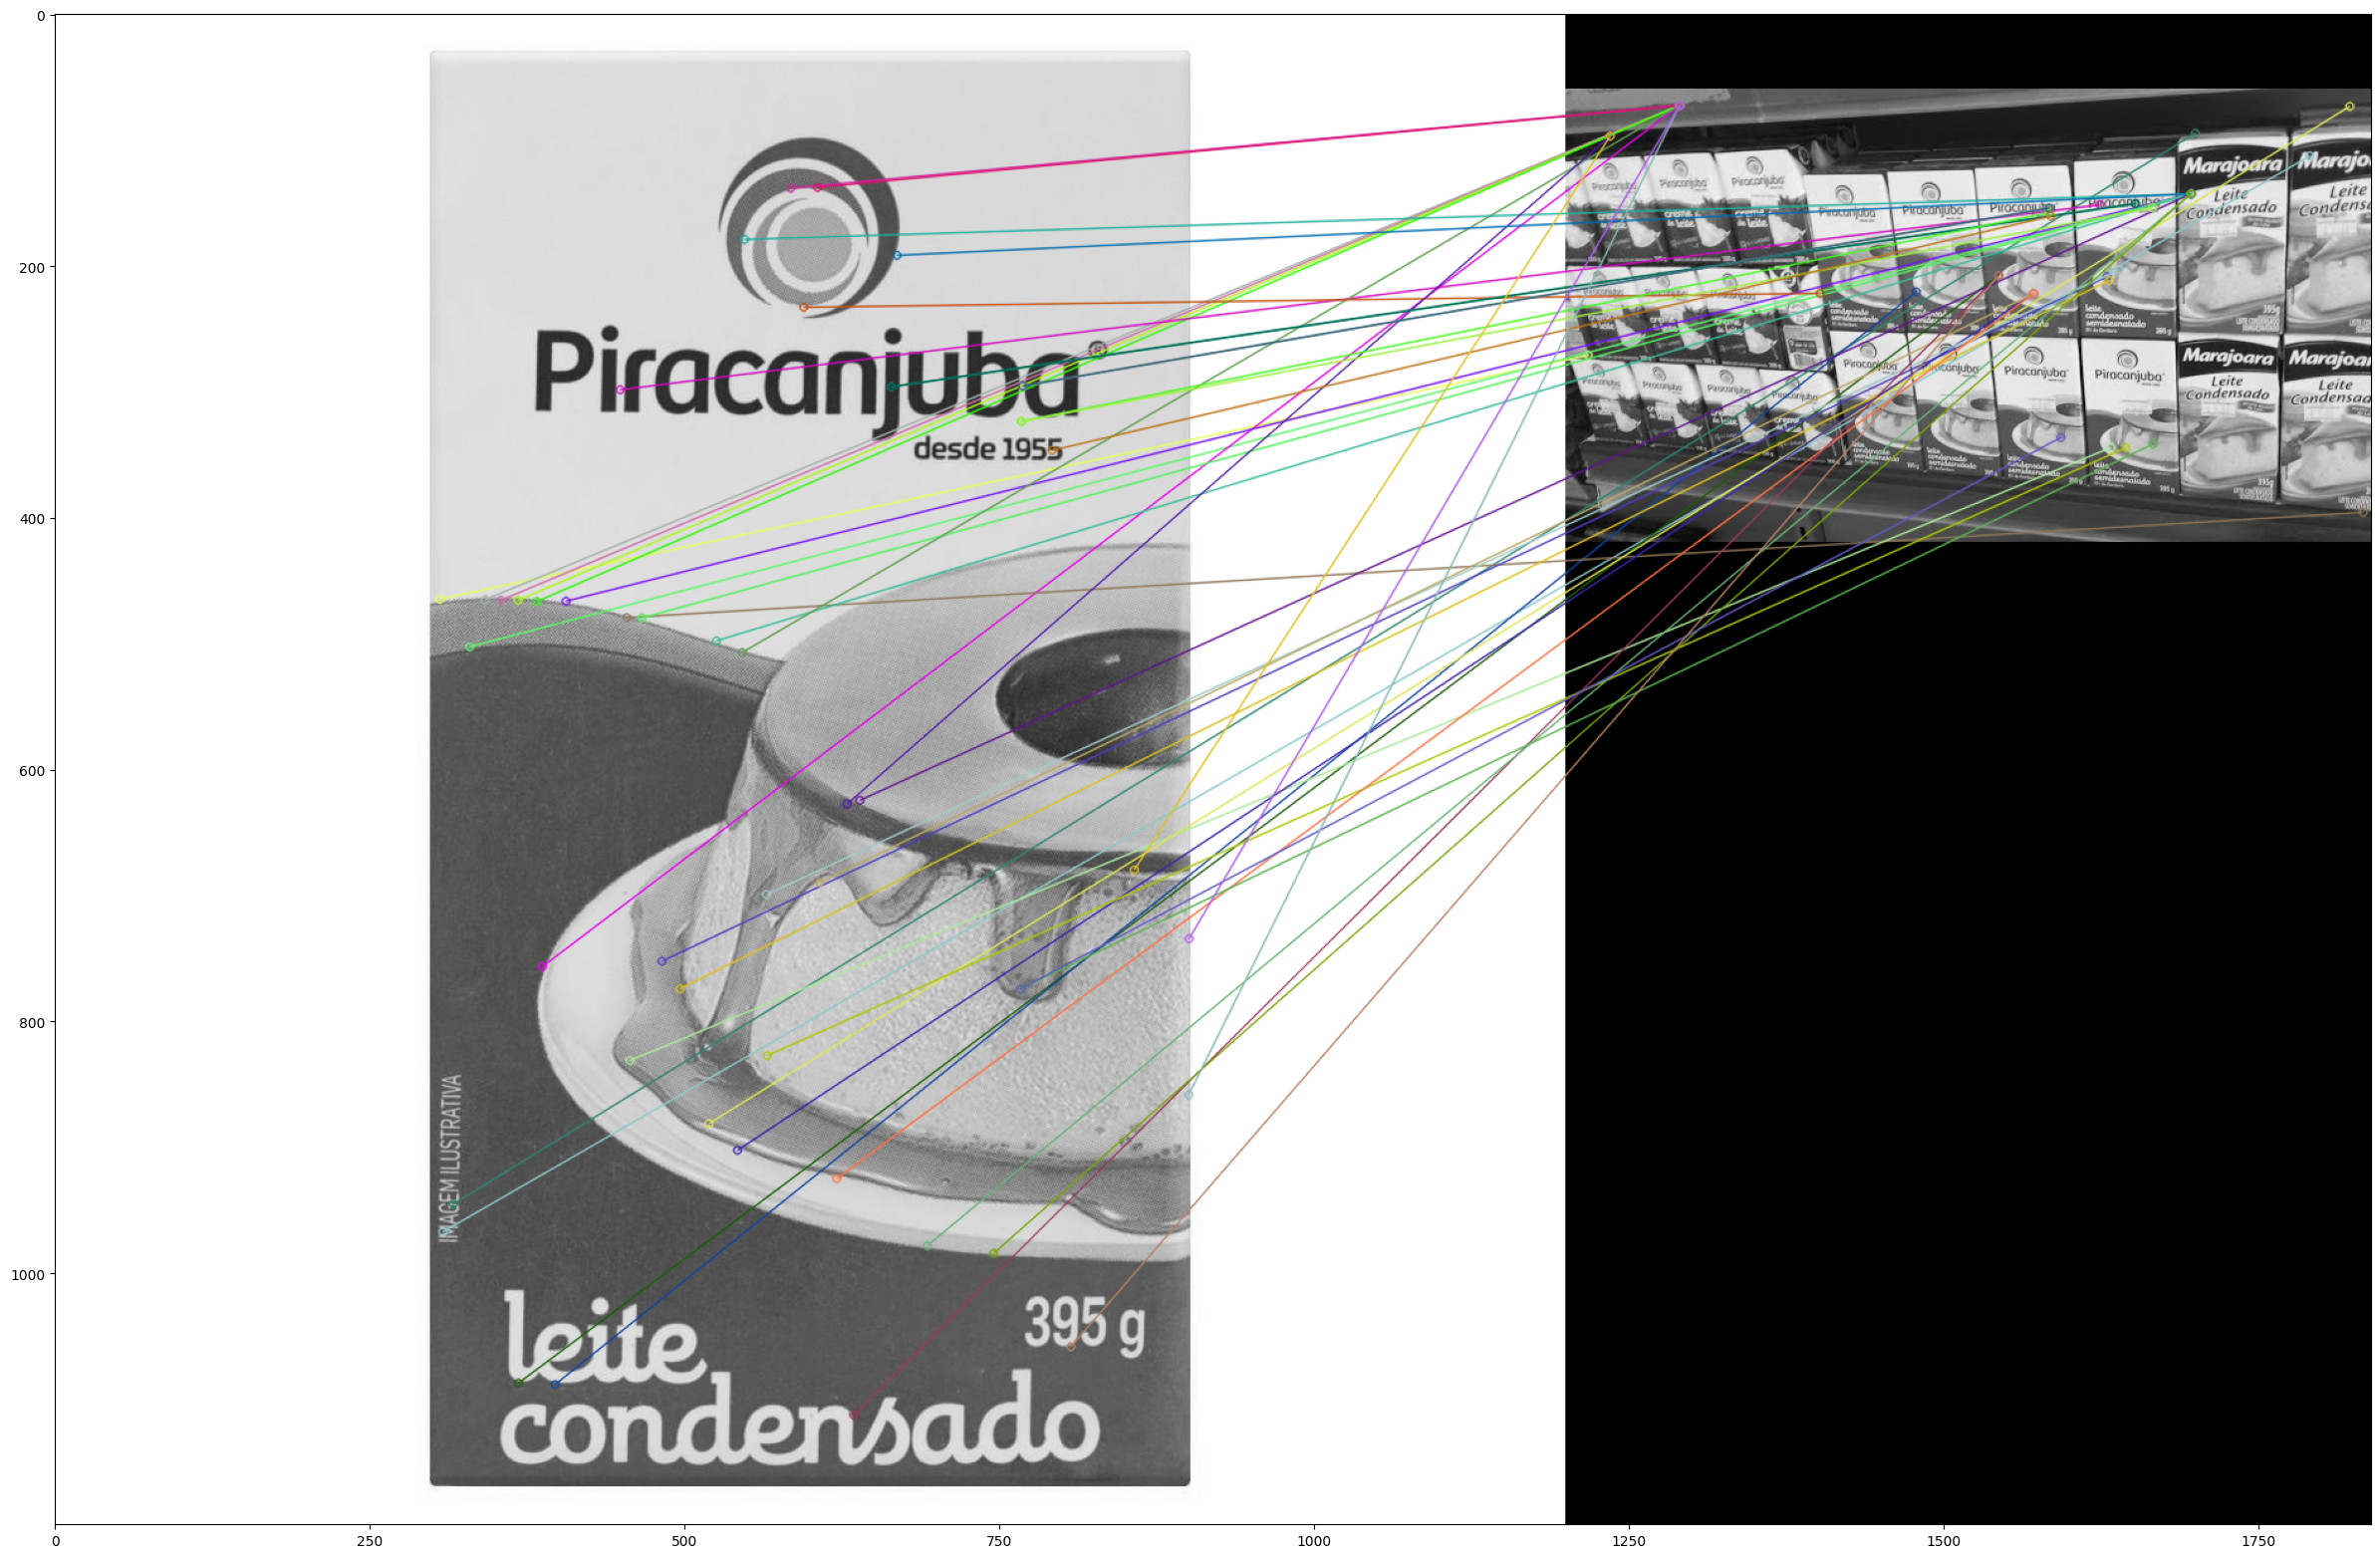

In [32]:
exibirImagem(flann_matches)

In [33]:
matchesMask = [[0,0] for i in range(len(matches))]

In [37]:
# matchesMask

In [38]:
for i, (match1, match2) in enumerate(matches):
    if(match1.distance < 0.75 * match2.distance):
        matchesMask[i] = [1,0]

In [42]:
draw_params = dict(matchColor = (0, 0, 255), singlePointColor = (255, 0, 0), matchesMask = matchesMask, flags = 0)

In [43]:
flann_matches = cv2.drawMatchesKnn(item, kp1, prateleira, kp2, matches, None, **draw_params)

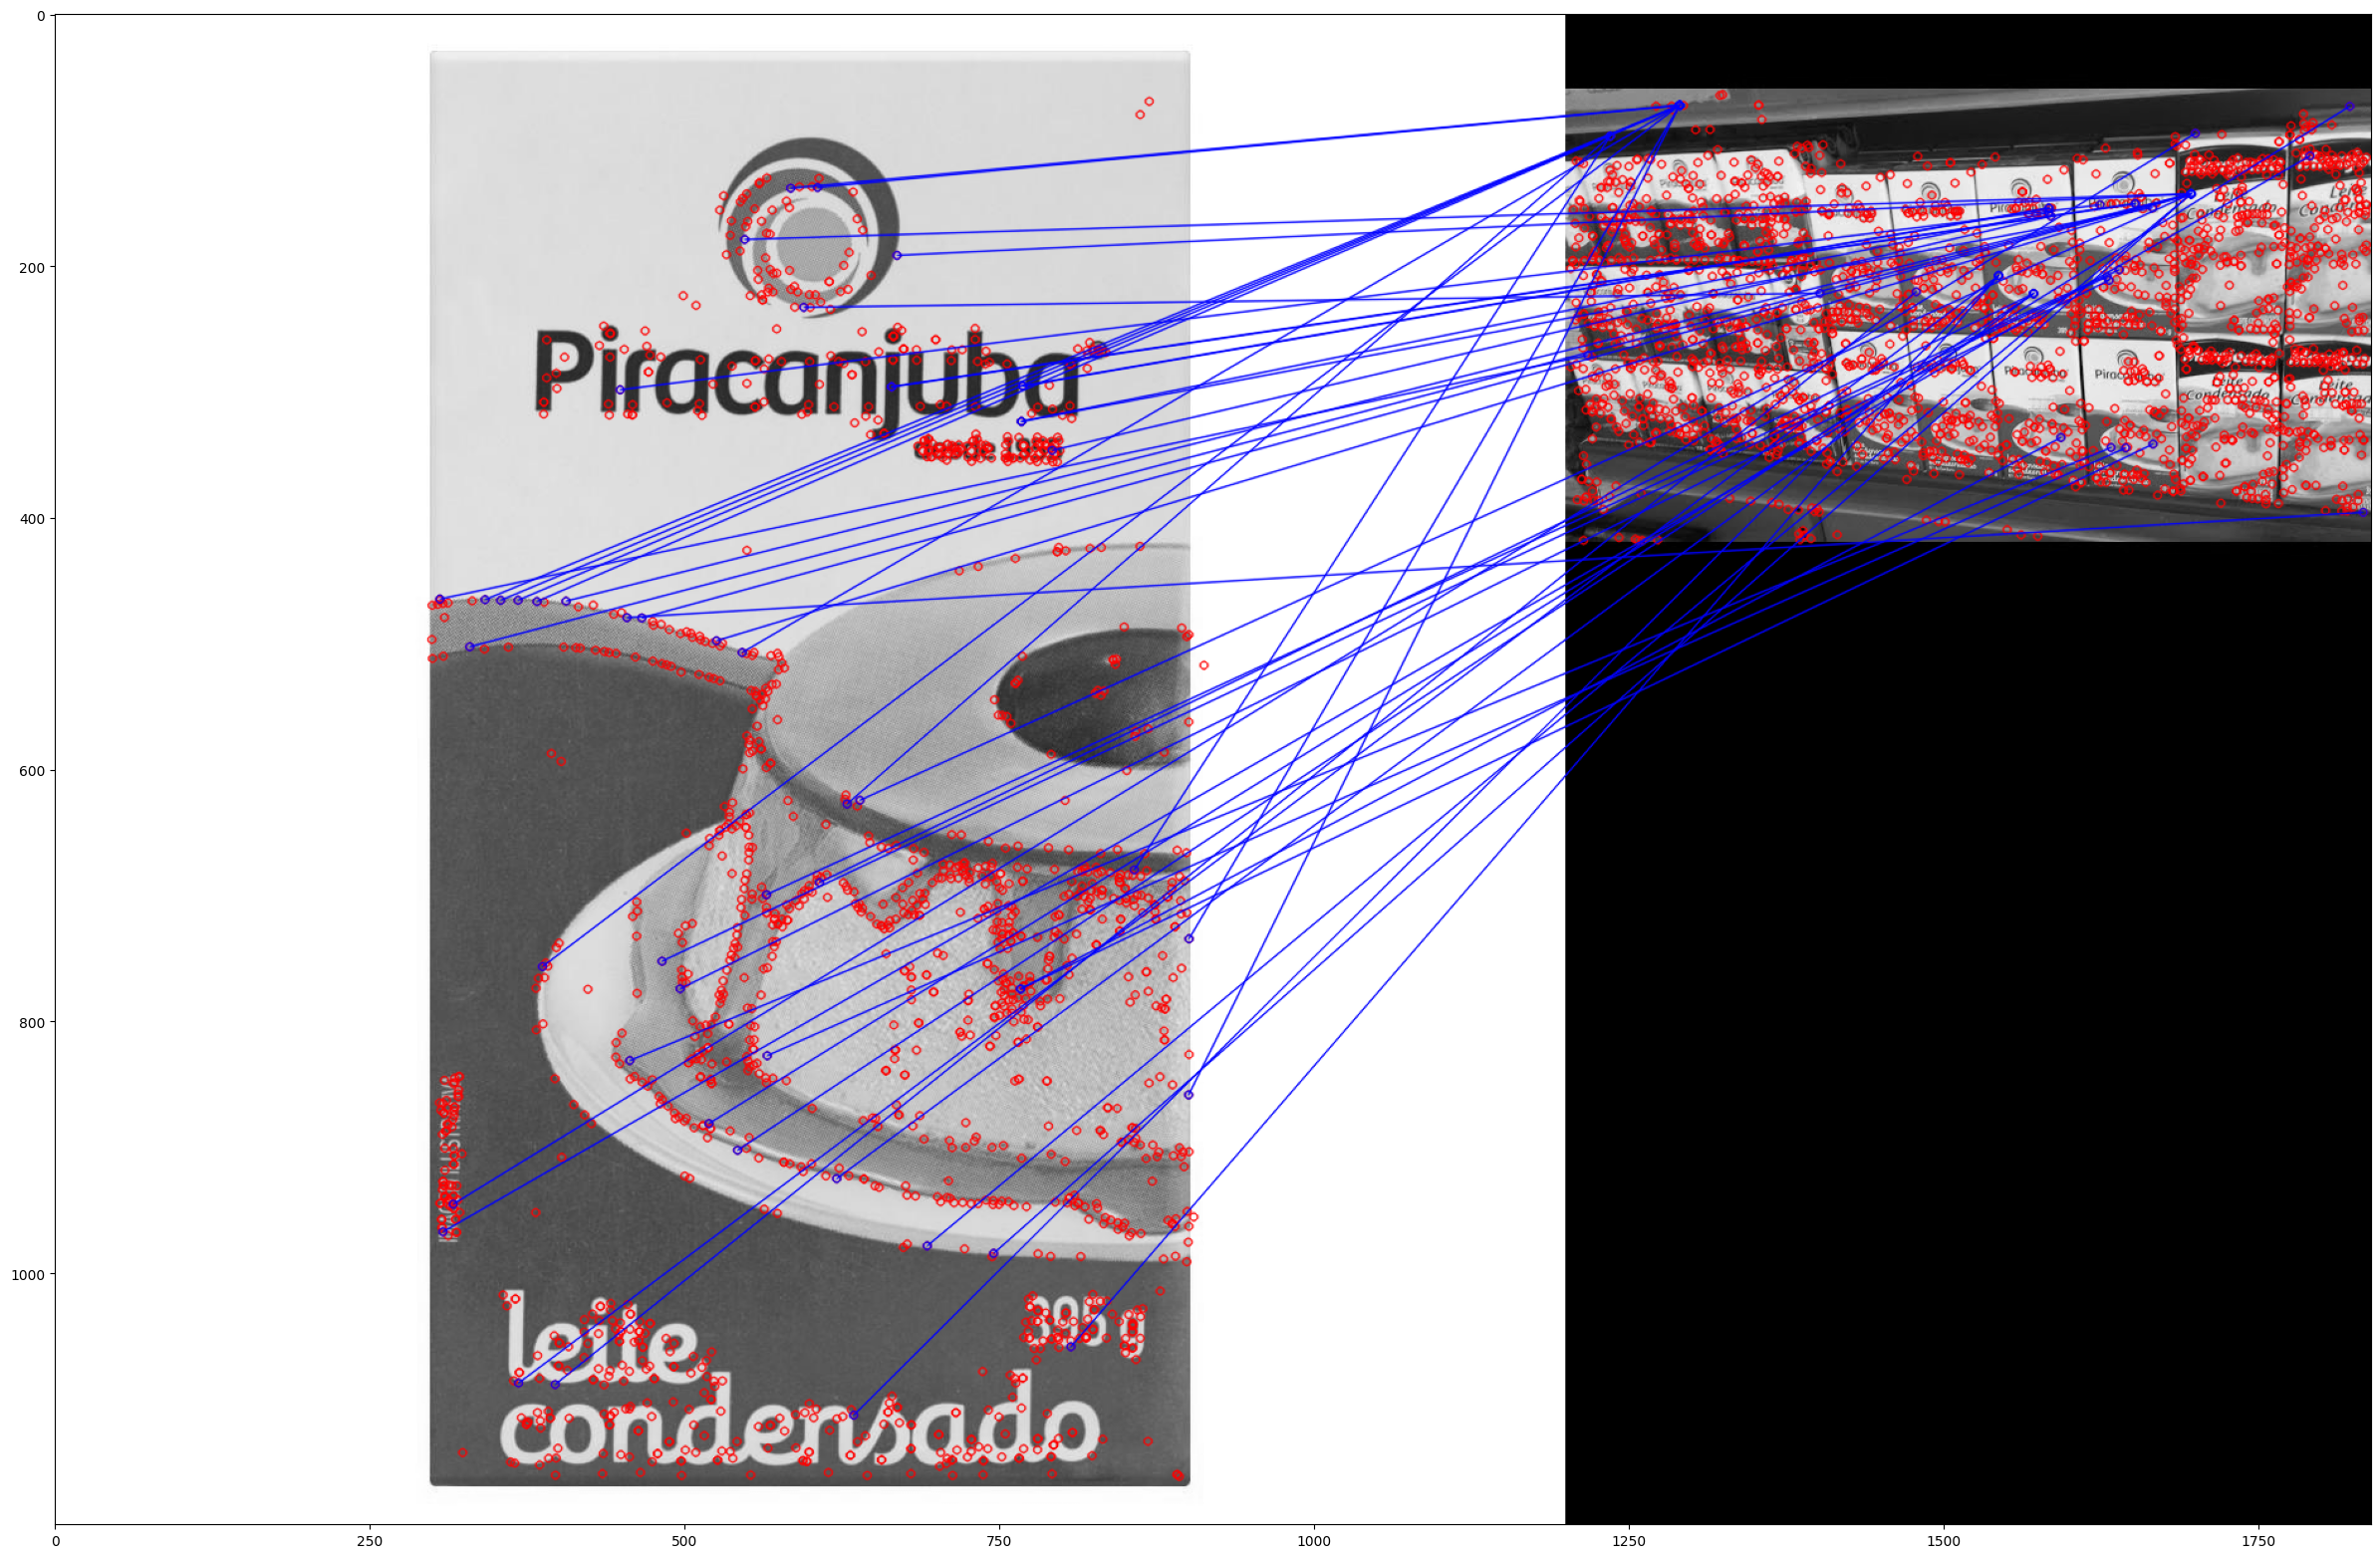

In [44]:
exibirImagem(flann_matches)